In [118]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import math as m
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline
from sklearn.metrics import accuracy_score

import sklearn.linear_model

In [119]:
data =  pd.read_csv("C:/Users/User/Desktop/ml/individual_task2/train.csv")
#data =  pd.read_csv("train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [121]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


DATA VISUALIZATION

In [122]:
#sns.pairplot(data)
#plt.show()

In [123]:
#sns.pairplot(data,hue='price_range')

In [124]:
class NeuralNet:
  
    
    def __init__(self, hidden_layer_sizes, normalize = True, learning_rate = 0.01, num_iter = 30000, precision = None):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
        self.hidden_layer_sizes = hidden_layer_sizes
        self.precision = precision
    
    def __normalize(self, X, mean = None, std = None):
       
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / s**2
        return X_new, m, s

    def __sigmoid(self, Z):
       
        return 1 / (1 + np.exp(-Z))
    
    
    
    def __initialize_parameters(self):
        hidden_layer_sizes = self.hidden_layer_sizes
        parameters = {}
        for l in range(1, len(hidden_layer_sizes)):
            parameters['W' + str(l)] = np.random.randn(hidden_layer_sizes[l], hidden_layer_sizes[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((hidden_layer_sizes[l], 1))
        
        self.parameters = parameters


    def __forward_linear_activation(self, A_prev, W, b):
        
    
        Z = np.dot(W, A_prev) + b
        linear_cache = (A_prev, W, b)
        A = self.__sigmoid(Z)
        activation_cache = Z
        
        cache = (linear_cache, activation_cache)

        return A, cache
    
    def __multilayer_forward(self, X):       
        parameters = self.parameters
        caches = []
        A = X
        L = len(parameters) // 2

        for l in range(1, L):
            A_prev = A 
            A, cache = self.__forward_linear_activation(A_prev, parameters["W"+str(l)], parameters["b"+str(l)])
            caches.append(cache)
            
        AL, cache = self.__forward_linear_activation(A, parameters["W"+str(L)], parameters["b"+str(L)])
        caches.append(cache)
        
        assert(AL.shape == (1,X.shape[1]))

        return AL, caches


    def __backward_linear_activation(self, dA, cache):
        
        linear_cache, activation_cache = cache
        
        Z = activation_cache
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        
        A_prev, W, b = linear_cache
        m = A_prev.shape[1]
        dW = 1 / m * np.dot(dZ, A_prev.T)
        db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)
        
        return dA_prev, dW, db


    def __multilayer_backward(self, X, Y, caches):
        grads = {}
        AL = X
        L = len(caches)
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)

        dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        
        current_cache = caches[L-1]
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = self.__backward_linear_activation(dAL, current_cache)
        
        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.__backward_linear_activation(grads["dA" + str(l + 1)], current_cache)
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp
            
        return grads
    

    
    def compute_cost(self, A, Y):
        m = Y.shape[1]
        res = Y * np.log(A) + (1 - Y) * np.log(1 - A)
        J = -(1 / m) * np.sum(res)
        return J
    
    def __update_parameters(self, grads):
        parameters = self.parameters;
        learning_rate = self.learning_rate
        L = len(parameters) // 2

        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
            
        self.parameters = parameters;
        

    def fit(self, X_vert, Y_vert, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        self.__initialize_parameters()

        for i in range(0, self.num_iter):

            AL, caches = self.__multilayer_forward(X)
            
            cost = self.compute_cost(AL, Y)
            
            grads = self.__multilayer_backward(AL, Y, caches)
            
            self.__update_parameters(grads)
            
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            if print_cost and i % 100 == 0:
                costs.append(cost)
                
                if len(costs) > 1 and self.precision != None and np.abs(costs[-2] - costs[-1]) < self.precision:
                    print('Stopping gradient descent ...')
                    break

        if print_cost:
                plt.plot(costs)
                plt.ylabel("Cost")
                plt.xlabel("Iteration, *100")
                plt.show()

    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__multilayer_forward(X)[0]
        
        return np.column_stack((probs.T, 1 - probs.T))
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)[:, 0]
        return (positive_probs >= 0.5).astype(int)

Text(0.5, 1.0, 'Correlation ')

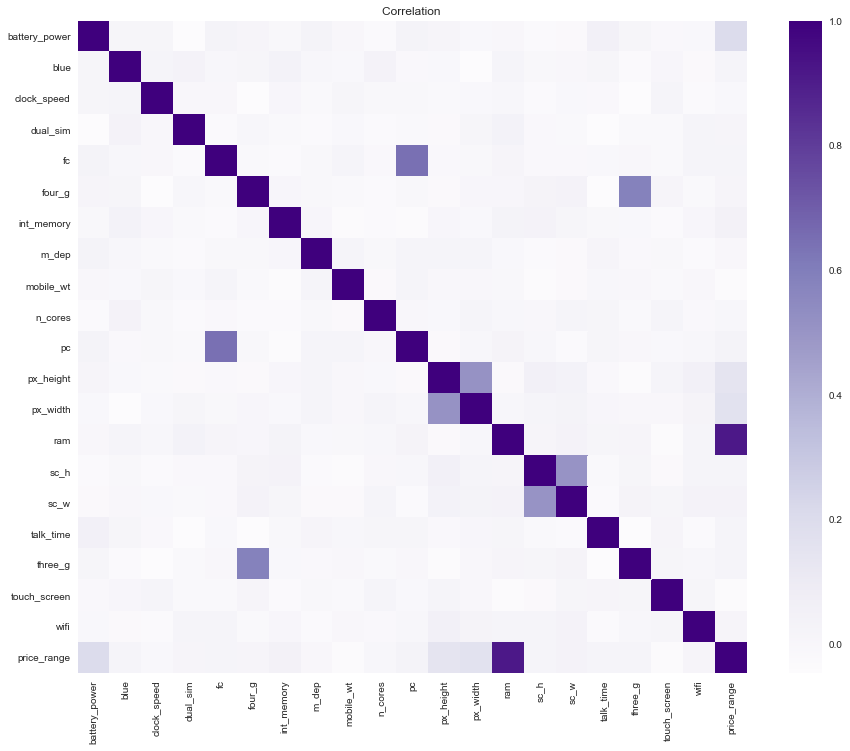

In [125]:
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

Price range correlation

In [126]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

As we can see the price the most depends on ram

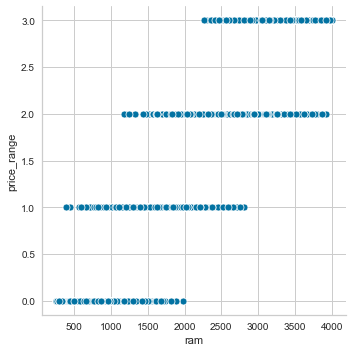

In [127]:
sns.relplot(x="ram", y="price_range", data=data);

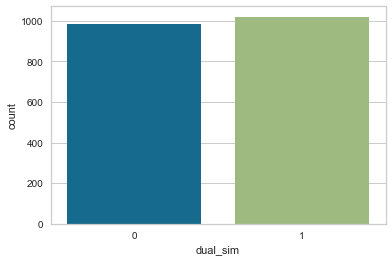

In [128]:
sns.countplot(data['dual_sim'])
plt.show()

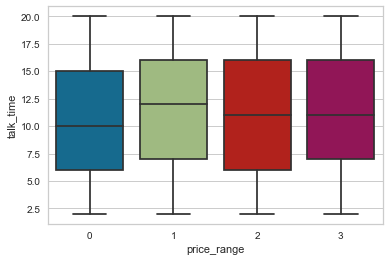

In [129]:
sns.boxplot(data['price_range'],data['talk_time'])

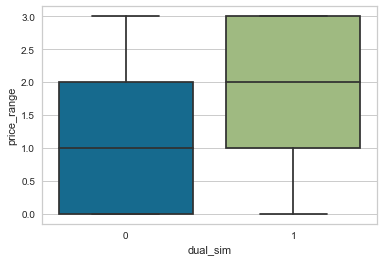

In [130]:
sns.boxplot(data['dual_sim'],data['price_range'])

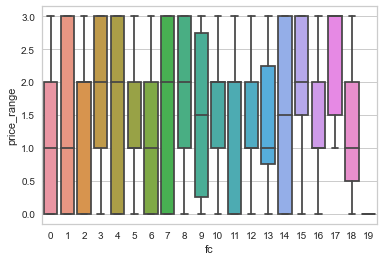

In [131]:
sns.boxplot(data['fc'],data['price_range'])
plt.show()

TOUCH SCREEN-RAM AND PRICE RANGE

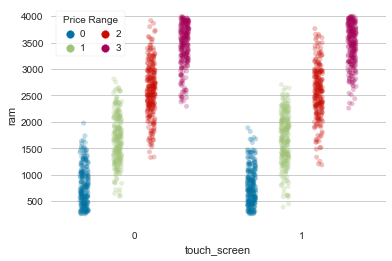

In [132]:
import altair as alt
from  altair.vega import v3
import json
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=data, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

 ram is affected by price

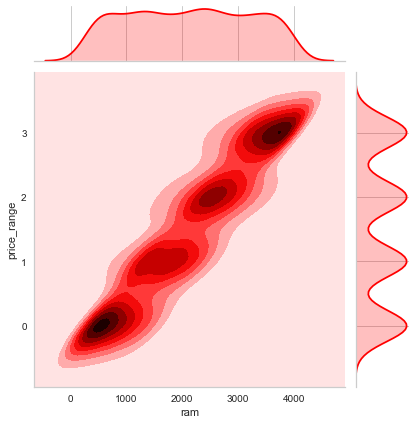

In [133]:
sns.jointplot(x='ram',y='price_range',data=data,color='red',kind='kde');

Camera

Text(0.5, 0, 'MegaPixels')

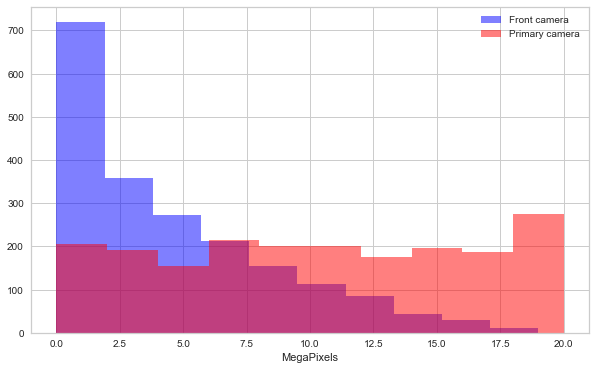

In [134]:
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

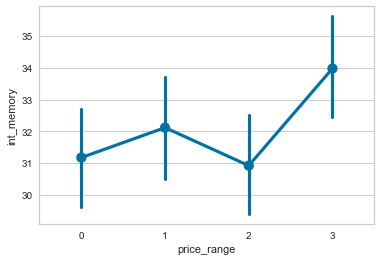

In [135]:
sns.pointplot(y="int_memory", x="price_range", data=data)

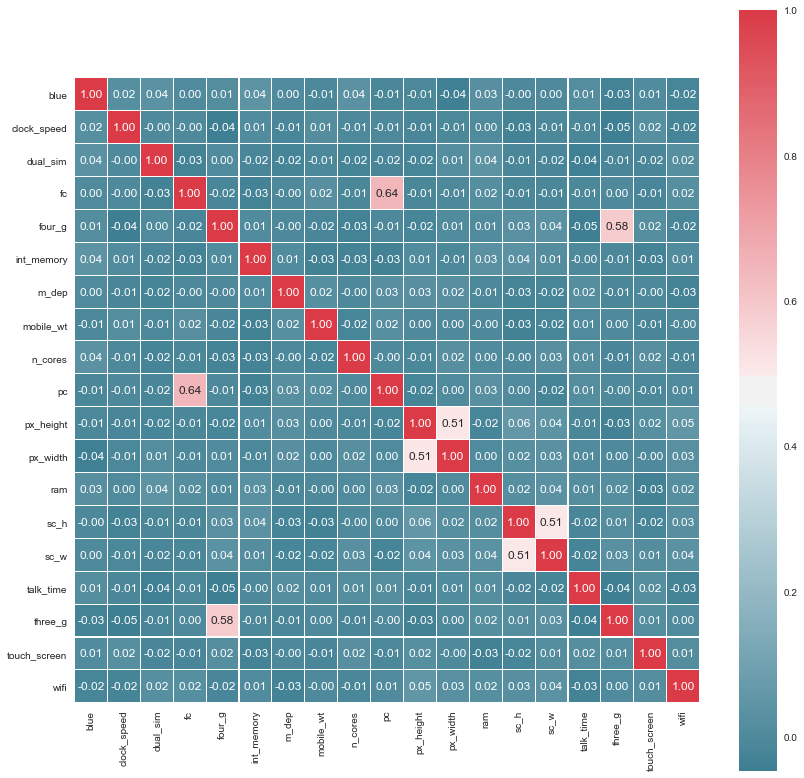

In [136]:
corr = data.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap = colormap, linewidths=0.1, linecolor='white')

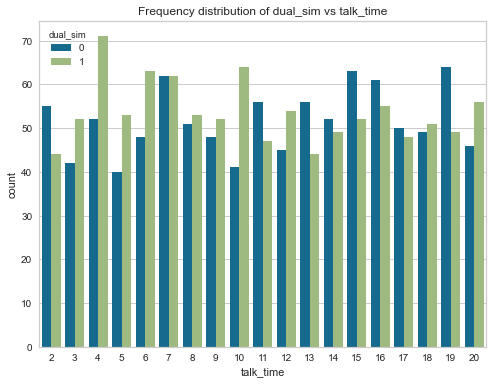

In [137]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="talk_time", hue="dual_sim", data=data)
ax.set_title("Frequency distribution of dual_sim vs talk_time")
colors = ['gold', 'lightskyblue']
plt.show()

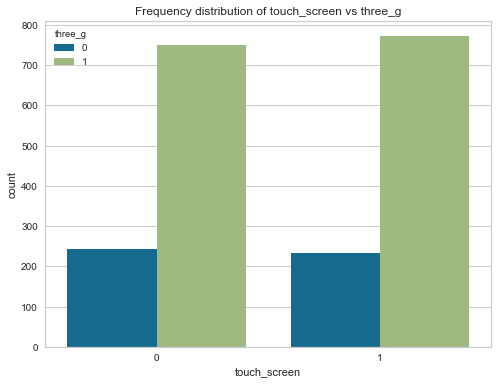

In [138]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="touch_screen", hue="three_g", data=data)
ax.set_title("Frequency distribution of touch_screen vs three_g")
colors = ['gold', 'lightskyblue']
plt.show()

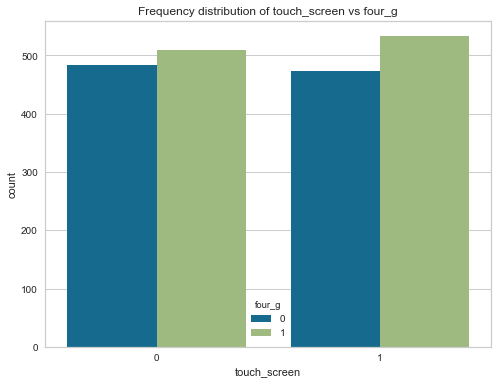

In [139]:
f, ax = plt.subplots(figsize=(8, 6))
colors = ['gold', 'lightskyblue']
ax = sns.countplot(x="touch_screen", hue="four_g", data=data)
ax.set_title("Frequency distribution of touch_screen vs four_g")
plt.show()

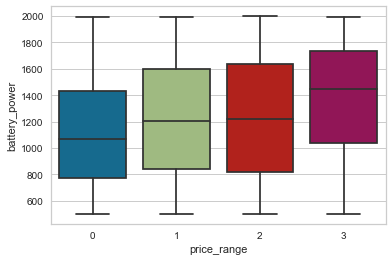

In [140]:
sns.boxplot(x="price_range", y="battery_power", data=data)

% of Phones which support 3G

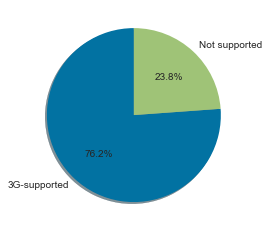

In [141]:
labels = ["3G-supported",'Not supported']
values=data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

% of Phones which support 4G

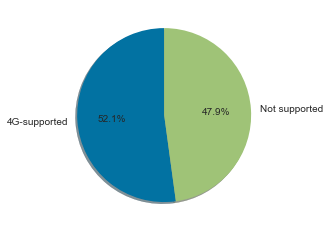

In [142]:
labels4g = ["4G-supported",'Not supported']
values4g = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

DUAL SIM- RAM AND PRICE RANGE
Following distibution plots show dual sim or not and ram values according to price range.

0- has not dual , 1- has wifi

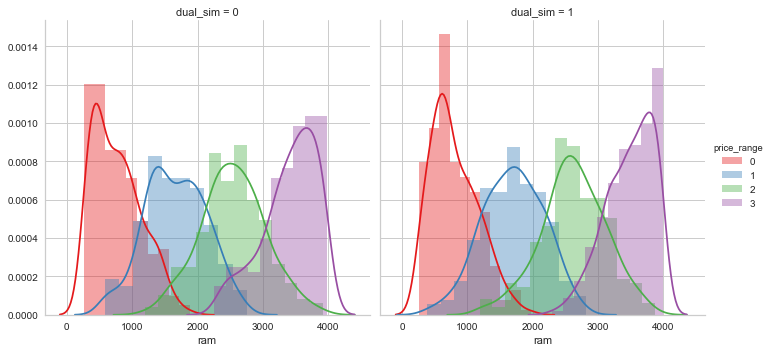

In [143]:
g = sns.FacetGrid(data, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

DATA

In [144]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [145]:
x_train.shape, x_test.shape

((1600, 20), (400, 20))

In [146]:
y_train

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

normalization

In [147]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
class Normalize(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = 255
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X / self.scaler
        return X

In [148]:
norm = Normalize()
trans = norm.fit_transform(x_train)
trans.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.001957,0.001944,0.001589,0.002027,0.000889,0.002032,0.001922,0.001749,0.001949,0.001977,0.001935,0.001281,0.001955,0.001946,0.002047,0.001247,0.001955,0.002961,0.002000,0.001988
std,0.001142,0.001961,0.001281,0.001960,0.000894,0.001960,0.001150,0.001263,0.001145,0.001285,0.001188,0.000884,0.001136,0.001146,0.001176,0.000950,0.001182,0.001687,0.001961,0.001961
min,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000948,0.000000,0.000314,0.000000,0.000206,0.000000,0.000886,0.000436,0.000948,0.001120,0.000980,0.000556,0.000960,0.000967,0.001120,0.000436,0.000871,0.003922,0.000000,0.000000
50%,0.001962,0.000000,0.001569,0.003922,0.000619,0.003922,0.001898,0.001743,0.001928,0.001681,0.001961,0.001123,0.001946,0.001952,0.001961,0.001089,0.001961,0.003922,0.003922,0.003922
75%,0.002931,0.003922,0.002667,0.003922,0.001445,0.003922,0.002925,0.003050,0.002908,0.003361,0.002941,0.001875,0.002959,0.002939,0.003081,0.001961,0.003050,0.003922,0.003922,0.003922
max,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922


In [149]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']
print(numerical)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [150]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numerics = list(x.columns) 
numerics_transform = Pipeline([('normalize', Normalize())])


process = ColumnTransformer(
    transformers=[
        ('numbers', numerics_transform, numerics)])

In [151]:
x_train.shape

(1600, 20)

In [152]:
from sklearn.neural_network import MLPClassifier
clf = Pipeline(steps=[('process', process),
                      ('classifier', MLPClassifier())])
clf.fit(x_train, y_train)

c:\nastia\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numbers',
                                                  Pipeline(memory=None,
                                                           steps=[('normalize',
                                                                   Normalize())],
                                                           verbose=False),
                                                  ['battery_power', 'blue',
                                                   'clock_speed', 'dual_sim',
                                                   'fc', 'four_g', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'pc', 'px_height',...
    

In [153]:
print(clf.score(x_test, y_test))


0.51


In [154]:
y_test_pred = clf.predict(x_test)

In [155]:
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred})
print(res)

     y_actual  y_pred
0           0       0
1           0       0
2           1       0
3           1       1
4           2       3
..        ...     ...
395         2       0
396         3       3
397         3       3
398         1       1
399         0       0

[400 rows x 2 columns]


In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, pos_label='positive', average='weighted')
recall = recall_score(y_test, y_test_pred, pos_label='positive', average='weighted')

print('Custom Logistic Regression ')
print('Accuracy       : ', accuracy)
print('Precision      : ', precision)
print('Recall         : ', recall)

Custom Logistic Regression 
Accuracy       :  0.51
Precision      :  0.49344485842026825
Recall         :  0.51


c:\nastia\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Creating & Training Logistic Regression Model (sklearn)

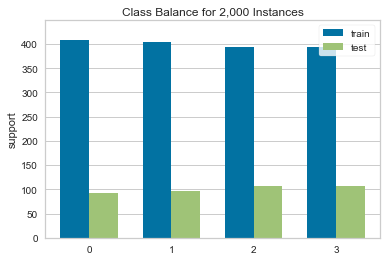

In [157]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [158]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))


train accuracy: 0.97125
test accuracy: 0.8375


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
logmodel  = LogisticRegression()
logmodel .fit(x_train, y_train)
y_test_pred = logmodel.predict(x_test)
logmodel.score(x_test,y_test)
rms = m.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred) 
mae = mean_absolute_error(y_test, y_test_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.3082207001484488
MSE:  0.095
MAE:  0.095


c:\nastia\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Creating & Training Linear Regression Model

In [160]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_test,y_test)

0.9077139501473083

Creating & Training Decision Tree Model

In [161]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree.score(x_test,y_test)


0.8375

In [162]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.8425

In [163]:
y_pred = rfc.predict(x_test)
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)

RMSE: 0.3968626966596886
MSE:  0.1575
MAE:  0.1575


Custom Logistic Regression

In [164]:
def normalize(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0, ddof=1)
    X_norm = (x - mean) / std
    return X_norm, mean, std

In [165]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
    plt.show()

In [166]:
def prepare_X(x):
    m = x.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [167]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [168]:
def h(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

In [169]:
def cost_function(x, y, theta):
    m = x.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(x, theta)) - (1 - y) * np.log(1 - h(x, theta))).mean()
    return J

In [170]:
def gradient_descent(x, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = x.shape[0]
    J_history = []
    
    J = cost_function(x, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        
        theta = theta - alpha*np.dot(x.T, (h(x, theta) - y))/m;
        
        J = cost_function(x, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history


In [171]:
def predict(x, mean, std, theta):
    X_test_proc = prepare_X(x)
    predictions = h(X_test_proc, theta)
    return predictions

In [172]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [173]:
X_train.shape


(1400, 20)

In [174]:
y_train.shape

(1400,)

In [175]:
import numpy as np 
theta = np.zeros((20,1))

In [176]:
X_new, mean, std = normalize(X_train)
y_train = y_train.reshape(1400,1)

In [177]:
cost_function(X_train, y_train, theta)

0.6931471805599454

In [178]:

new_theta, Js = gradient_descent(X_train, y_train, theta, 0.01, 1e-7, 1000, False)
print(new_theta, len(Js))

c:\nastia\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
c:\nastia\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


[[3.13516965]
 [2.59163463]
 [2.10020214]
 [2.64605496]
 [1.15543821]
 [2.67112816]
 [2.62694617]
 [2.28303346]
 [2.37298879]
 [2.64394726]
 [2.5170992 ]
 [2.06020901]
 [3.06451493]
 [5.37229548]
 [2.62852789]
 [1.68344081]
 [2.51310309]
 [3.8266705 ]
 [2.17805854]
 [2.53727607]] 1001


In [179]:
y_pred = h(X_test, new_theta)

In [180]:
rms = m.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:",rms)
print("MSE: ", mse)
print("MAE: ", mae)



RMSE: 1.2609516129909148
MSE:  1.5899989703043897
MAE:  1.0466661546273135
